# California Districts Housing Price Prediction
The objective is to predict California Districts housing price using Machine Learning algorithms.

The project is inspired from the *Hands-on Machine Learning with Scikit-Learn, Keras & TensorFlow* book Chapter 2. There are some adaptations (coding & analysis) made to the sample codes given on Chapter 2.

**Reference:**
1. *Hands-on Machine Learning with Scikit-Learn, Keras & TensorFlow*
2. [California Districts Housing Price Dataset](https://github.com/ageron/handson-ml2/tree/master/datasets/housing)
3. [California image](https://github.com/ageron/handson-ml2/blob/master/images/end_to_end_project/california.png)

The project consists of the following sections,

| Section | Part                                            |Explanation                                    | 
|---------|:-                                               |:-                                             |
| 0       | [Housing Prediction Class](#section0)           | Define basic methods related to the project |
| 1       | [Loading the Data](#section1)     | Load the dataset |
| 2       | [Plot the Data](#section2)     | Plot the dataset         |
| 3       | [Exploratory Data Analysis](#section3)     | Gain insight from the training set         |
| 4       | [Data Preparation](#section4)     | Create a full pipeline for data preparation         |
| 5       | [Select & Train Models](#section5)     | Explore some ML regression algorithms         |
| 6       | [Model Tuning](#section6)     | Tune the hyperparameter to optimze the model         |
| 7       | [Conclusion](#section7)     | Conclusion, take aways, and what's next         |

## Import Library

In [1]:
import os, tarfile, pandas as pd, matplotlib.pyplot as plt, numpy as np
from six.moves import urllib
from sklearn.model_selection import StratifiedShuffleSplit
%matplotlib inline

<a id="section0"></a>
## PART 0: HOUSING PREDICTION CLASS

In this section, we will define a Housing Prediction Class.

The class will consist of the following methods,

| Pipeline | Part               |Explanation                       | 
| ---------|:-                  |:-                                |
| 1        | Load the dataset   | Load dataset from the github |
| 2        | Create train/validate/test set   | Divide the dataset for training/validation/test with random sampling |
| 3        | Stratified Sampling            | Divide the dataset for training/validation/test with stratified sampling w.r.t. `median_income`   |

In [2]:
class housing_prediction:
    def __init__(self):
        self.ROOT_PATH = "https://raw.githubusercontent.com/ageron/handson-ml2/master/"
    
    def load_data(self):
        HOUSING_PATH = os.path.join("datasets")
        HOUSING_URL = self.ROOT_PATH + "datasets/housing/housing.tgz"
        DATASET_PATH = os.path.join(HOUSING_PATH, "housing.csv")
        
        if not os.path.isfile(DATASET_PATH):
            if not os.path.isdir(HOUSING_PATH):
                os.makedirs(HOUSING_PATH)
            
            tgz_path = os.path.join(HOUSING_PATH, "housing.tgz")
            urllib.request.urlretrieve(HOUSING_URL, tgz_path)
            housing_tgz = tarfile.open(tgz_path)
            housing_tgz.extractall(path= HOUSING_PATH)
            housing_tgz.close()
            self.data = pd.read_csv(DATASET_PATH)
            print("Datasets successfully downloaded and successfully loaded")
        else:
            self.data = pd.read_csv(DATASET_PATH)
            print("Datasets already exist and successfully loaded")
        
    def create_train_validation_test_set(self, train_frac, validation_frac):
        # create train/validation/test set without stratified sampling
        np.random.seed(42)
        shuffled_indices = np.random.permutation(len(self.data))
        train_set_size = int(len(self.data) * train_frac)
        validation_set_size = int(len(self.data) * validation_frac)
        test_set_size = int(len(self.data) * (1 - train_frac - validation_frac))
        train_indices = shuffled_indices[:train_set_size]
        validation_indices = shuffled_indices[train_set_size:validation_set_size]
        test_indices = shuffled_indices[validation_set_size:test_set_size]
        
        return self.data.iloc[train_indices], self.data.iloc[validation_indices], self.data.iloc[test_indices]
    
    def stratified_sampling(self, size, seed):
        split = StratifiedShuffleSplit(n_splits=1, test_size=size, random_state=seed)
        
        #Stratified sampling based on the income category
        for train_index, test_index in split.split(self.data, self.data["income_category"]):
            strat_train_set = housing.data.loc[train_index]
            strat_test_set = housing.data.loc[test_index]
        
        #Then, let's drop the `income_category` since it is no longer needed
        for set_ in (strat_train_set, strat_test_set, self.data):
            set_.drop("income_category", axis=1, inplace=True)
        
        return strat_train_set, strat_test_set

<a id="section1"></a>
## PART 1: LOADING THE DATA

### 1.1: Get The Data
The dataset is obtained by calling the `load_data` method in the `housing_prediction()`.
If the dataset is already exist, skip the download and load the data directly.

In [3]:
housing = housing_prediction()
housing.load_data()
housing.data.head()

Datasets already exist and successfully loaded


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


### 1.2: Dataset Information
Lets explore the raw data first,

In [4]:
housing.data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


From data above, it is indicated that there are null values on Feature 4: `total_bedrooms` (**20433** out of 20640). 
Moreover, there are 5 types on the `ocean_proximity` are as follows. Let's inspect the objects inside it.

In [5]:
housing.data["ocean_proximity"].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

The feature `ocean_proximity` is distributed evenly except the `Island`. The user should carefully examine the weight of the `Island` category. Furthermore, let's take a closer look on the correlation matrix (how other features are correlated to the `median_housing_value`)

In [6]:
correlation_matrix = housing.data.corr()
correlation_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

There are 3 take aways from the raw data.
1. The dataset requires data cleaning to treat NaN values,
2. The `ocean_proximity` requires categorical treatment since it is not an ordinal variable.
3. The `median_income` is highly correlated to the `median_house_value`. Thus, it might be important to create the training/test dataset using a Stratified Sampling based on the `median_income`. 

### 1.3: Create Train/Test Set

There are 4 approaches in creating train/test datasets

| No | Options | Notes |
| :----------- | :----------- | :----------- |
| 1 | Randomly shuffles the dataset (e.g. using Numpy/Scikit-learn) | No repeatability. Each time we load the dataset, it would create different models |
| 2 | Option 1 BUT with a seed | Repeatability but if any new data is added, there would be none |
| 3 | Randomly shuffles using hashes | OPTION 2 and no problems with addition of new data. However, we might not divide the data 'correctly' |
| 4 | Option 3 + Stratified Sampling | OPTION 3 BUT we divide the data correctly |

It is not recommended to use Option 1 since eventually, the model will **see** all the data and there is no repeatability. Option 3 might be tempting but the dataset might be not representative due to improper sampling.

In this project, Option 4 is chosen. The training/test dataset will be created using Stratified Sampling. Let's plot the distribution of `median_income` in histogram

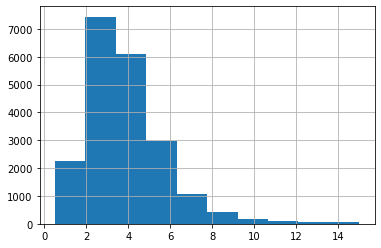

In [7]:
housing.data["median_income"].hist()
plt.show()

Then, let's create a new feature called `income_category`. In `income_category`, we divide the `median_income` into 5 categories.

In [8]:
housing.data["income_category"] = pd.cut(housing.data["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

Let's plot the distribution of the `income_category`

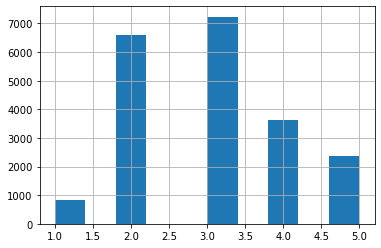

In [9]:
housing.data["income_category"].hist()
plt.show()

After that, we could begin dividing the set for training and testing. We will be using 20% of the data as `test_size` (0.2) and 42 as the seed `random_state`

In [10]:
strat_train_set, strat_test_set = housing.stratified_sampling(0.2, 42)

Then, we assign variable `housing` as the training data for Part 2

In [11]:
housing = strat_train_set.copy()
#housing.info()

<a id="section2"></a>
## PART 2: DATA VISUALIZATION
Let's plot the geographical distribution data based on latitude longitude and latitude.

Normal scatter approach


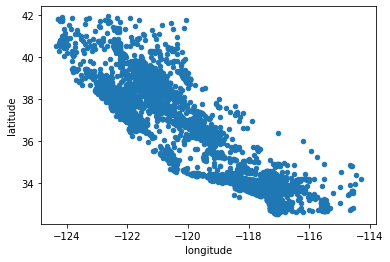

In [12]:
print('Normal scatter approach')
housing.plot(kind='scatter', x ='longitude', y='latitude')
plt.show()

However, it is hard to understand the figure. Let's apply density into the plotting

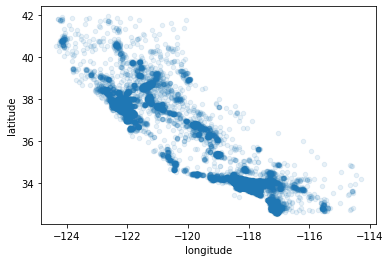

In [13]:
housing.plot(kind='scatter', x ='longitude', y='latitude', alpha=0.1)
plt.show()

To make it more intuitive, let's stack the plot into the California map. We also add the population and districts housing price to the plot

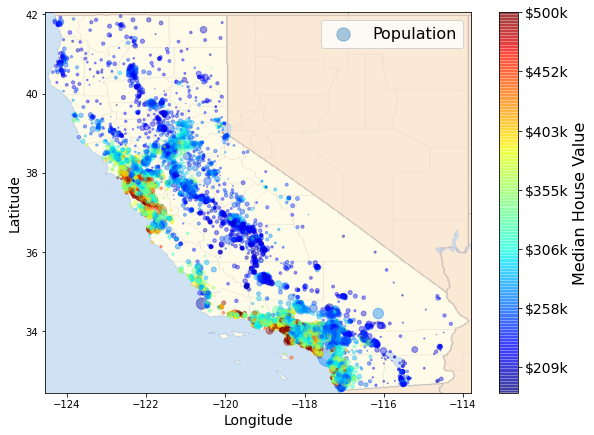

In [14]:
import matplotlib.image as mpimg

california_img=mpimg.imread(os.path.join(os.getcwd(),"california.png"))

ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                  s=housing['population']/100, label="Population",
                  c="median_house_value", cmap=plt.get_cmap("jet"),
                  colorbar=False, alpha=0.4)
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
plt.show()

<a id="section3"></a>
## PART 3: Explaratory Data Analysis
### 3.1: Dataset Distribution
Now, let's take a closer look on the training set's statistical description

In [15]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,16512.000000,16512.000000,16512.000000,16512.000000,16354.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.575834,35.639577,28.653101,2622.728319,534.973890,1419.790819,497.060380,3.875589,206990.920724
std,2.001860,2.138058,12.574726,2138.458419,412.699041,1115.686241,375.720845,1.904950,115703.014830
min,-124.350000,32.540000,1.000000,6.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.800000,33.940000,18.000000,1443.000000,295.000000,784.000000,279.000000,2.566775,119800.000000
50%,-118.510000,34.260000,29.000000,2119.500000,433.000000,1164.000000,408.000000,3.540900,179500.000000
75%,-118.010000,37.720000,37.000000,3141.000000,644.000000,1719.250000,602.000000,4.744475,263900.000000
max,-114.310000,41.950000,52.000000,39320.000000,6210.000000,35682.000000,5358.000000,15.000100,500001.000000


The `median_house_value` has the minimum price of **14,999 USD** and maximum of **500,001 USD**. 

The data is illustrated below,

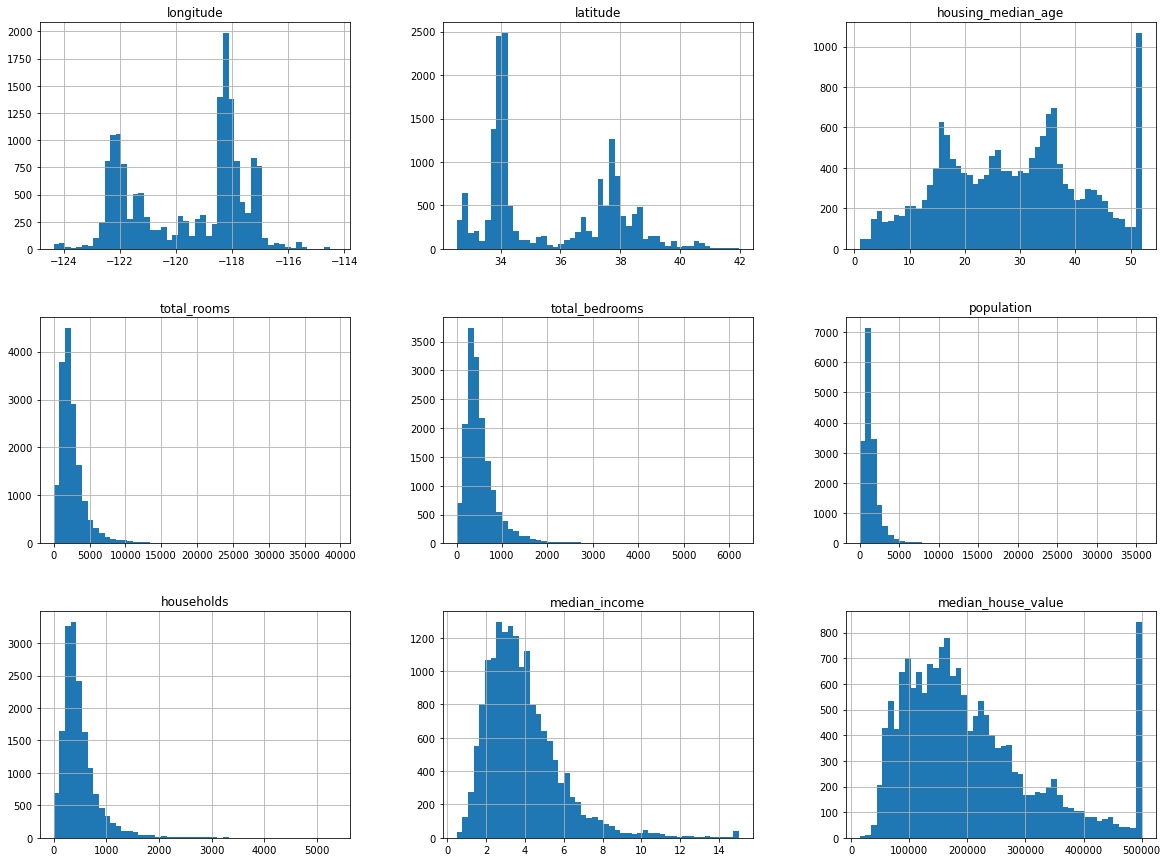

In [16]:
housing.hist(bins = 50, figsize = (20,15))
plt.show()

There are 5 take aways from the graphs above
1. The `... _income` are not in USD but rather in **USD 10,000**. Moreover, income above **USD150,000** are capped (included in `15`)
2. `housing_median_age` and `median_house_value` are also capped. 
3. The capped parameters in point 1 & 2 is important to notice as the model might be not representative to predict new data above these thresholds
4. Data is on **different scale**. Feature scaling is necessary.
5. Last but not least, the data is **tail heavy**. Some Machine Learning algorithms might suffer from it. Thus, data transformation might be needed to transform the data into a bell-shaped distributions 

### 3.2: Dataset Correlation Matrix

Next step is to explore the training dataset using a correlation matrix

In [17]:
correlation_matrix = housing.corr()
correlation_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.687160
total_rooms           0.135097
housing_median_age    0.114110
households            0.064506
total_bedrooms        0.047689
population           -0.026920
longitude            -0.047432
latitude             -0.142724
Name: median_house_value, dtype: float64

From the data above, it is somehow proven that the `median_income`,`total_rooms`, and `housing_median_age` are highly correlated to the median house value.
Lets try to explore some new features to see how it is correlated to the median_house_value

In [18]:
housing_test_new_features = housing.copy()

housing_test_new_features["rooms_per_household"] = housing["total_rooms"]/housing["households"]
housing_test_new_features["bedrooms_per_rooms"] = housing["total_bedrooms"]/housing["total_rooms"]
housing_test_new_features["population_per_household"] = housing["population"]/housing["households"]

correlation_matrix_new = housing_test_new_features.corr()
correlation_matrix_new["median_house_value"].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.687160
rooms_per_household         0.146285
total_rooms                 0.135097
housing_median_age          0.114110
households                  0.064506
total_bedrooms              0.047689
population_per_household   -0.021985
population                 -0.026920
longitude                  -0.047432
latitude                   -0.142724
bedrooms_per_rooms         -0.259984
Name: median_house_value, dtype: float64

The synthesized features seem interesting to keep. Thus, we can consider to add add these features for tuning the model.

<a id="section4"></a>
## PART 4: DATA PREPARATION
### 4.1: Data Cleaning (NaN values)
There are 3 approaches for Data Cleaning

| No | Options | Notes |
| :----------- | :----------- | :----------- |
| 1 | Get rid of the corresponding data districts | pandas drop na the whole districts |
| 2 | Get rid  of the whole data | pandas drop features that contains na data |
| 3 | Set the values to some value (zero, the mean, the median, etc) | scikit-learn imputer |

In this project, we will choose the Option 3. The NaN values will be replaced automatically by its median using Scikit-Learn Imputer

### 4.2: Transforming the Category
We should transform the Ocean Proximity feature since the data is not Ordinal but rather Categorical. The transformation is conducted with OneHotEncoder module from Scikit-Learn

### 4.3: Handling new features
As mentioned in the correlation matrix, there are a few artificial features:
1. rooms_per_household
2. bedrooms_per_room
3. population_per_household

In this project, let's try to add the these features. Moreover, we could add option to vary which features to add. The transformation will be conducted using data.preprocessing module pipeline from scikit-learn

### 4.4: Features Scaling
Since the data is distributed in a different scale, feature scaling is necessary. The feature scaling will be done using Scikit-Learn StandardScaler

### 4.5: Data Preprocessing Pipeline
Load libraries for preprocessing

In [19]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

Drop label `median_house_value` from the dataset. Then, assign `median_house_value` as `housing_labels`

In [20]:
housing = strat_train_set.drop("median_house_value", axis=1)
housing_labels = strat_train_set["median_house_value"].copy()

Lets get the indices of the features needed to artificially create new features

In [21]:
col_names = "total_rooms", "total_bedrooms", "population", "households"
rooms_index, bedrooms_index, population_index, households_index = [
    housing.columns.get_loc(c) for c in col_names]

Let's define the custom transformation to add new feature(s). The custom transformation is a part of preprocessing pipeline to automatically transform the data with an ease. 

In this custom transformation, we will add `rooms_per_household` and `population_per_household` while `bedrooms_per_room` is conditional.

In [22]:
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True): # no *args or **kargs
        self.add_bedrooms_per_room = add_bedrooms_per_room
    def fit(self, X, y=None):
        return self  # nothing else to do
    def transform(self, X):
        rooms_per_household = X[:, rooms_index] / X[:, households_index]
        population_per_household = X[:, population_index] / X[:, households_index]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_index] / X[:, rooms_index]
            return np.c_[X, rooms_per_household, population_per_household,
                         bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]

Assign attribute for OneHotEncoder (`ocean_proximity`) and other features that wont be processed by OneHOtEncoder.

In [23]:
num_attribs = list(housing.drop("ocean_proximity", axis = 1))
cat_attribs = ["ocean_proximity"]

Let's define the pipeline to transform the data.
The transformation is performed in 2 steps:
1. Step 1: Apply imputer, add new features, apply features scaling
2. Step 2: Apply OneHotEncoder to `ocean_proximity`

In [24]:
# STEP 1
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('attribs_adder', CombinedAttributesAdder()),
        ('std_scaler', StandardScaler()),
    ])

# STEP2
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

Let's perform the whole data preprocessing using the `full_pipline`.

In [25]:
housing_prepared = full_pipeline.fit_transform(housing)

The training data has been fully prepared. We could begin the training now.

<a id="section5"></a>
## PART 5: SELECT & TRAIN A MODEL
There are 2 algorithms will be explored first,
1. Linear Regression
2. Decission Tree Regressor

Let's load the libraries needed

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

## 5.1: Linear Regression

In [27]:
linear_regression = LinearRegression()
linear_regression.fit(housing_prepared, housing_labels)

LinearRegression()

Let's evaluate the Linear Regression model on the training set using Root Mean Squared Error and Mean Absolute Error metrics

In [28]:
# Calculate RMSE
housing_predictions_lin_reg = linear_regression.predict(housing_prepared)
linear_mse = mean_squared_error(housing_labels, housing_predictions_lin_reg)
linear_rmse = np.sqrt(linear_mse)

# Calculate MAE
lin_mae = mean_absolute_error(housing_labels, housing_predictions_lin_reg)

print("The Linear Regression model has RMSE of "+ str('%.2f'%linear_rmse) +" and MAE of " + str('%.2f'%lin_mae) + ".")

The Linear Regression model has RMSE of 68628.20 and MAE of 49439.90.


## 5.2: Decision Tree Regressor

In [29]:
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor(random_state=42)

Let's evaluate the Decision Tree Regressor model on the training set using Root Mean Squared Error and Mean Absolute Error metrics

In [30]:
# Calculate RMSE
housing_predictions_tree = tree_reg.predict(housing_prepared)
tree_mse= mean_squared_error(housing_labels, housing_predictions_tree)
tree_rmse = np.sqrt(tree_mse)

# Calculate MAE
tree_mae = mean_absolute_error(housing_labels, housing_predictions_tree)


print("The Decision Tree Regressor model has RMSE of "+ str('%.2f'%tree_rmse) +" and MAE of " + str('%.2f'%tree_mae) + ".")

The Decision Tree Regressor model has RMSE of 0.00 and MAE of 0.00.


The zero values on RMSE and MAE raises an indication of model overfitting (to the training data). Lets evaluate both models using the test set.

## 5.3: Models Evaluation

Lets load the test set

In [31]:
test_set = strat_test_set.drop("median_house_value", axis=1)
test_label = strat_test_set["median_house_value"].copy()

Lets pre-process the data using full_pipeline

In [32]:
test_set = full_pipeline.fit_transform(test_set)

Evaluate the **Linear Regression Model** using the Test Set

In [33]:
# Calculate RMSE
eval_lin_reg = linear_regression.predict(test_set)
eval_linear_mse = mean_squared_error(test_label, eval_lin_reg)
eval_linear_rmse = np.sqrt(eval_linear_mse)
eval_linear_rmse

# Calculate MAE
eval_lin_mae = mean_absolute_error(test_label, eval_lin_reg)

print("The Linear Regression model has RMSE of "+ str('%.2f'%eval_linear_rmse) +" and MAE of " + str('%.2f'%eval_lin_mae) + ".")

The Linear Regression model has RMSE of 66973.71 and MAE of 49293.04.


Evaluate the **Decision Tree Regressor Model** using the Test Set

In [34]:
# Calculate RMSE
eval_tree = tree_reg.predict(test_set)
eval_tree_mse= mean_squared_error(test_label, eval_tree)
eval_tree_rmse = np.sqrt(eval_tree_mse)

# Calculate MAE
eval_tree_mae = mean_absolute_error(test_label, eval_tree)


print("The Decision Tree Regressor model has RMSE of "+ str('%.2f'%eval_tree_rmse) +" and MAE of " + str('%.2f'%eval_tree_mae) + ".")

The Decision Tree Regressor model has RMSE of 109845.96 and MAE of 75769.03.


## 5.4: Compiling Results
Here are the compiled results of the models

In [35]:
compiled_results = pd.DataFrame({"RMSE" : [linear_rmse, eval_linear_rmse, 
                                           tree_rmse, eval_tree_rmse],
                                 "MAE" : [lin_mae, eval_lin_mae, 
                                          tree_mae, eval_tree_mae,]},
                                index = pd.MultiIndex.from_tuples(
                                    [('Linear Regression','Training Set'),('Linear Regression','Test Set'),
                                     ('Decision Tree Regressor','Training Set'),('Decision Tree Regressor','Test Set')],
                                    names=['Algorithm','Data set used']))

pd.options.display.float_format = '{:,.0f}'.format
compiled_results

RMSE    MAE
Algorithm               Data set used               
Linear Regression       Training Set   68,628 49,440
                        Test Set       66,974 49,293
Decision Tree Regressor Training Set        0      0
                        Test Set      109,846 75,769

## 5.5: Analysis
After evaluating both models, here are the take aways:
1. Linear Regression has high error metrics on both training set and test set
2. Decision Tree Regressor has metrics values of 0 on the training set while high error on the test set.


### 1 : Error
After evaluated on the test set, both models have Mean Absolute Error of **49,293 USD** (Linear Regression) and **75,769 USD** (Decision Tree Regressor). Both of them are quite high considering the housing price is within **15,000 - 500,000 USD.**

### 2 : Linear Regression Model
It might be tempting to use Linear Regression model since it has relatively lower metrics during the evaluation. However, we should notice these values are still significant. It it possible that the model suffers a high biased problem (underfitting) since it has high metrics on both training and test set. Ploting the learning curve might help to identify whether the model suffers a high biased problem or not.
If it suffers a high biased problem, user should consider changing the algorithm, obtain/synthesize new features, etc.

### 3 : Decision Tree Regressor Model
After evaluating both models on the test set, the Decision Tree Regressor Model has higher RMSE and MAE during the evaluation. It is likely that the Decision Tree Regressor Model overfits the training set. Ploting the learning curve might help to identify whether the model suffers a high variance problem or not. If it suffers a high variance problem, user should consider use regularization, remove features, use more data, etc. User should be careful in choosing regularization hyperparameter(s). If choosen correctly, regularization will help the model to generalize the model to new data. 


Let's explore Regularized Linear Regression

<a id="section6"></a>
# PART 6: Model Tuning
In this section, we will be using Random Forest Regressor (instead of Decision Tree Regressor) to tune the model. There are 2 approaches to tune the hyperparameter in scikit-learn:

1. GridSearchCV (define the matrix of possible values),
2. RandomizedSearchCV (randomized the values given the min and max).

This project will utilize the **RandomizedSearchCV** for model tuning. Moreover, the process will be conducted in parallel (`n_jobs = -1`) to speed up the process. During the model tuning, we will be using the scikit-learn k-fold cross-validation features to ensure the hyperparameter is not tuned to the test set.

## 6.1 : Random Forest Regressor
In this section, we will use Random Forest Regressor instead of Decision Tree Regressor. Random Forest Regressor works by training many number of Decision Trees on random subsets of the features, then averaging out their predictions (Ensemble Learning).

Note:
It takes time to finish the RandomizedSearchCV. By far, the optimized pars are as follow,

`(max_features=7, n_estimators=198, random_state=42)`

If the user has challenges to re-run `RandomizedSearchCV`, the user could choose to call RandomForestRegressor with the params above.

In [36]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

ensemble_model = RandomForestRegressor(random_state=42)

random_forest_parameter_distributions = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
    }

random_forest_randomized_search = RandomizedSearchCV(ensemble_model, 
                                                 param_distributions=random_forest_parameter_distributions,
                                                 n_iter=500, cv=5, scoring='neg_mean_squared_error', random_state=42,
                                                 n_jobs=-1)
random_forest_randomized_search.fit(housing_prepared, housing_labels)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
                   n_iter=500, n_jobs=-1,
                   param_distributions={'max_features': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001EC827B4C08>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000001EC827752C8>},
                   random_state=42, scoring='neg_mean_squared_error')

Let's print the results from the RandomSearchCV,

In [38]:
print(" Random Forest Regressor Optimization results from RandomSearchCV " )
print("\n The best estimator across ALL searched params:\n", random_forest_randomized_search.best_estimator_)
print("\n The best score across ALL searched params:\n", np.sqrt(-random_forest_randomized_search.best_score_))
print("\n The best parameters across ALL searched params:\n", random_forest_randomized_search.best_params_)

 Random Forest Regressor Optimization results from RandomSearchCV 

 The best estimator across ALL searched params:
 RandomForestRegressor(max_features=7, n_estimators=198, random_state=42)

 The best score across ALL searched params:
 49088.87642712397

 The best parameters across ALL searched params:
 {'max_features': 7, 'n_estimators': 198}


Let's evaluate the *optimized* hyperparameter to the test set,

In [39]:
random_forest_optimized_prediction = random_forest_randomized_search.best_estimator_.predict(test_set)

# Calculate RMSE
eval_optimized_random_forest_mse = mean_squared_error(test_label, random_forest_optimized_prediction)
eval_optimized_random_forest_rmse = np.sqrt(eval_optimized_random_forest_mse)

# Calculate MAE
eval_optimized_random_forest_mae = mean_absolute_error(test_label, random_forest_optimized_prediction)

print("Evaluated using the Test Set,")
print("The Random Forest Regressor model has RMSE of "+ str('%.2f'%eval_optimized_random_forest_rmse) +" and MAE of " + str('%.2f'%eval_optimized_random_forest_mae) + ".")

Evaluated using the Test Set,
The Random Forest Regressor model has RMSE of 65748.35 and MAE of 49126.92.


In [40]:
random_forest_randomized_search.best_estimator_.feature_importances_

array([7.21039343e-02, 6.42941081e-02, 4.27594844e-02, 1.64322274e-02,
       1.56356786e-02, 1.61783600e-02, 1.51576257e-02, 3.46154983e-01,
       5.82156600e-02, 1.09212336e-01, 7.01595285e-02, 8.92904216e-03,
       1.58010148e-01, 5.95672564e-05, 3.18871535e-03, 3.50860110e-03])

**to be continued ...**

<a id="section7"></a>
## PART 7: Conclusion
The project explores some algortihms to predict the California's housing districts price. The following algorithms have been explored:
- [x] Linear Regression
- [x] Decision Tree Regressor
- [x] Random Forest Regressor
- [x] Use RandomizedSearchCV to obtain optimized hyperparameter(s)

After evaluation, it seems that the Linear Regression model has a biased (underfitting) problem while the Decision Tree Regressor has a variance problem (overfitting). The project then explored RandomizedSearchCV to tune the hyperparameter. **to be continued ...**

Here are some tasks to consider
- [ ] Synthesize/Remove features even more
- [ ] Use Support Vector Machine Regression
- [ ] Re-create the Machine Learning pipeline (integrate the whole process into a pipeline)

Last but not least, I'd like to thank Aurélien Géron. The project is inspired from the Hands-on Machine Learning with Scikit-Learn, Keras & TensorFlow book Chapter 2.